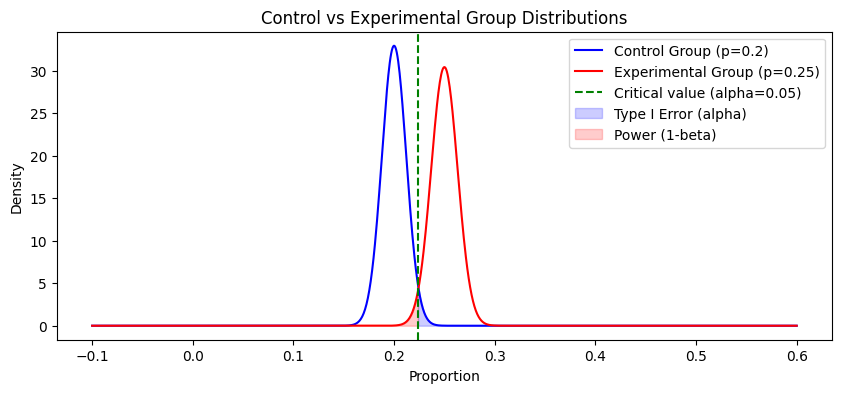

Required sample size per group: 1092


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.stats.api as sms

# Parameters
alpha = 0.05  # Significance level
power = 0.8  # Desired power
p_control = 0.2  # Baseline conversion rate (control group)
mde = 0.05  # Minimum detectable effect (difference between control and experiment)
p_experiment = p_control + mde  # Expected conversion rate in the experimental group

# Calculate the effect size
effect_size = sms.proportion_effectsize(p_control, p_experiment)

# Calculate the required sample size per group
sample_size_per_group = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha)
sample_size_per_group = int(np.ceil(sample_size_per_group))

# Generate normal distributions
x = np.linspace(-0.1, 0.6, 1000)
control_dist = norm(loc=p_control, scale=np.sqrt(p_control * (1 - p_control) / sample_size_per_group))
experiment_dist = norm(loc=p_experiment, scale=np.sqrt(p_experiment * (1 - p_experiment) / sample_size_per_group))

# Plot the distributions
plt.figure(figsize=(10, 4))
plt.plot(x, control_dist.pdf(x), label='Control Group (p=0.2)', color='blue')
plt.plot(x, experiment_dist.pdf(x), label='Experimental Group (p=0.25)', color='red')

# Significance level and critical value
z_critical = norm.ppf(1 - alpha / 2)
x_critical = p_control + z_critical * np.sqrt(p_control * (1 - p_control) / sample_size_per_group)
plt.axvline(x=x_critical, color='green', linestyle='--', label=f'Critical value (alpha={alpha})')

# Fill areas for alpha and power
plt.fill_betweenx(y=control_dist.pdf(x), x1=x, x2=x_critical, where=(x >= x_critical), color='blue', alpha=0.2, label='Type I Error (alpha)')
plt.fill_betweenx(y=experiment_dist.pdf(x), x1=x, x2=x_critical, where=(x <= x_critical), color='red', alpha=0.2, label='Power (1-beta)')

plt.title('Control vs Experimental Group Distributions')
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the calculated sample size
print(f"Required sample size per group: {sample_size_per_group}")


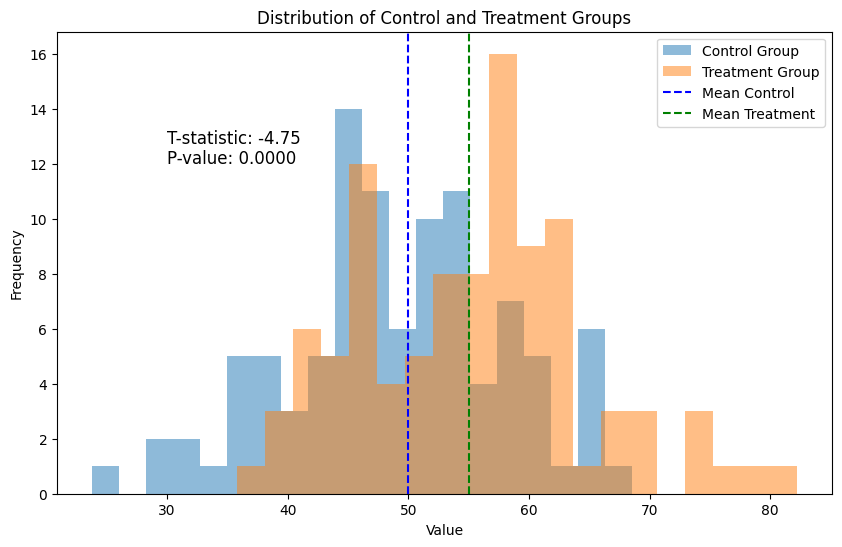

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
mean_control = 50  # Mean of control group
mean_treatment = 55  # Mean of treatment group
std_dev = 10  # Standard deviation for both groups
sample_size = 100  # Sample size for each group

# Generate synthetic data
np.random.seed(42)
control_data = np.random.normal(mean_control, std_dev, sample_size)
treatment_data = np.random.normal(mean_treatment, std_dev, sample_size)

# Calculate t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(control_data, treatment_data)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting control group
plt.hist(control_data, bins=20, alpha=0.5, label='Control Group')

# Plotting treatment group
plt.hist(treatment_data, bins=20, alpha=0.5, label='Treatment Group')


# Add a vertical line at the mean of each group
plt.axvline(x=mean_control, color='b', linestyle='--', label='Mean Control')
plt.axvline(x=mean_treatment, color='g', linestyle='--', label='Mean Treatment')

# Add legend and labels
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Control and Treatment Groups')

# Add annotation for t-test results
plt.text(30, 12, f'T-statistic: {t_statistic:.2f}\nP-value: {p_value:.4f}', fontsize=12)

# Show plot
plt.show()


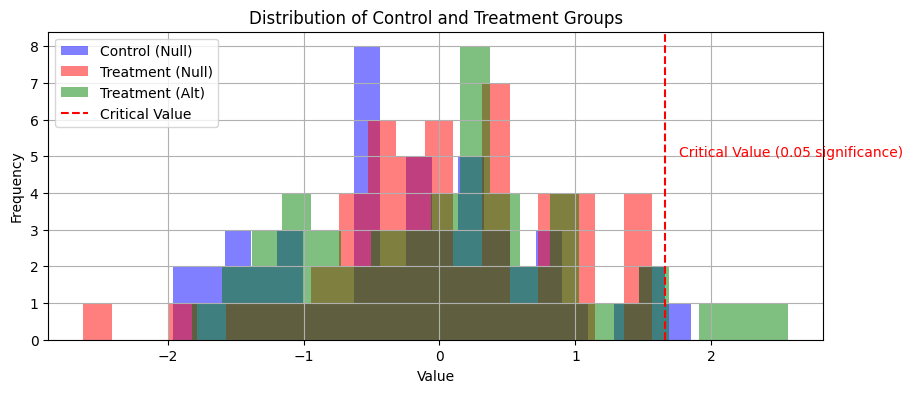

Fail to reject null hypothesis: p-value = 0.1456
No Type 2 error occurred
Statistical power (1 - beta): 0.1714


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
effect_size = 0.1  # Difference in means between control and treatment groups
alpha = 0.05  # Significance level
std_dev = 1.0  # Standard deviation for both groups
sample_size = 50  # Sample size for each group

# Assume under null hypothesis: means are the same
mean_control_null = 0.0
mean_treatment_null = 0.0

# Assume under alternative hypothesis: treatment group mean is shifted
mean_control_alt = 0.0
mean_treatment_alt = effect_size * std_dev

# Generate data under null hypothesis
np.random.seed(42)
control_data_null = np.random.normal(mean_control_null, std_dev, sample_size)
treatment_data_null = np.random.normal(mean_treatment_null, std_dev, sample_size)

# Generate data under alternative hypothesis
treatment_data_alt = np.random.normal(mean_treatment_alt, std_dev, sample_size)

# Calculate t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(control_data_null, treatment_data_alt)

# Determine critical value for alpha
critical_value = stats.t.ppf(1 - alpha, df=2*sample_size - 2)

# Plotting
plt.figure(figsize=(10, 4))

# Plot distributions under null hypothesis
plt.hist(control_data_null, bins=20, alpha=0.5, label='Control (Null)', color='blue')
plt.hist(treatment_data_null, bins=20, alpha=0.5, label='Treatment (Null)', color='red')

# Plot distribution under alternative hypothesis
plt.hist(treatment_data_alt, bins=20, alpha=0.5, label='Treatment (Alt)', color='green')

# Add critical value and annotation
plt.axvline(x=critical_value, color='red', linestyle='--', label='Critical Value')
plt.text(critical_value + 0.1, 5, f'Critical Value ({alpha} significance)', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Control and Treatment Groups')
plt.grid(True)

# Show plot
plt.show()

# Decision based on the test
if p_value < alpha:
    print(f"Reject null hypothesis: p-value = {p_value:.4f}")
else:
    print(f"Fail to reject null hypothesis: p-value = {p_value:.4f}")

# Calculate Type 1 and Type 2 errors
if p_value < alpha:
    # Null hypothesis is rejected
    if mean_treatment_alt <= mean_control_null + critical_value * std_dev / np.sqrt(sample_size):
        print(f"Type 1 error occurred")
    else:
        print(f"No Type 1 error occurred")
else:
    # Null hypothesis is not rejected
    if mean_treatment_alt > mean_control_null + critical_value * std_dev / np.sqrt(sample_size):
        print(f"Type 2 error occurred")
    else:
        print(f"No Type 2 error occurred")

# Calculate statistical power (1 - beta)
beta = stats.t.cdf(critical_value - (mean_treatment_alt - mean_control_null) / (std_dev / np.sqrt(sample_size)), df=2*sample_size - 2)
statistical_power = 1 - beta
print(f"Statistical power (1 - beta): {statistical_power:.4f}")


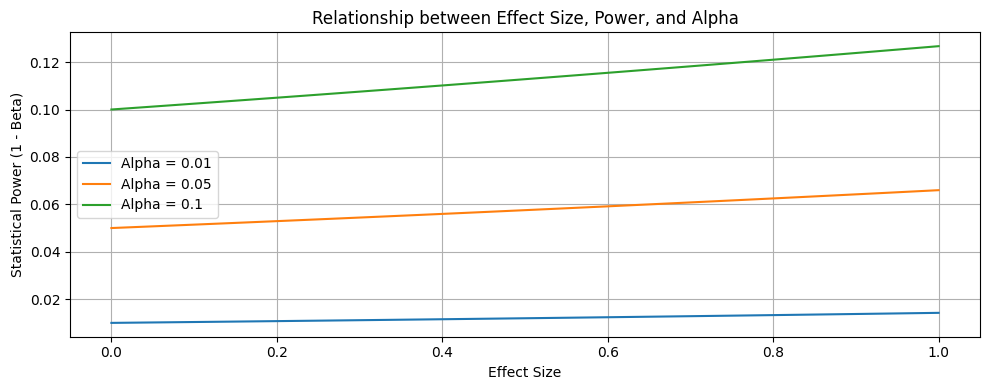

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
effect_sizes = np.linspace(0, 1, 100)  # Effect sizes ranging from 0 to 1
alphas = [0.01, 0.05, 0.1]  # Significance levels
sample_size = 50  # Sample size

# Initialize arrays to store results
betas = np.zeros((len(alphas), len(effect_sizes)))
power = np.zeros((len(alphas), len(effect_sizes)))

# Calculate beta and power for each alpha and effect size
for i, alpha in enumerate(alphas):
    df = 2 * sample_size - 2
    critical_value = stats.t.ppf(1 - alpha, df)
    
    for j, effect_size in enumerate(effect_sizes):
        effect_size_SE = effect_size / np.sqrt(sample_size)
        beta = stats.t.cdf(critical_value - effect_size_SE, df)
        betas[i, j] = beta
        power[i, j] = 1 - beta

# Plotting
plt.figure(figsize=(10, 4))

# Plot curves for each alpha
for i, alpha in enumerate(alphas):
    plt.plot(effect_sizes, power[i], label=f'Alpha = {alpha}')

plt.title('Relationship between Effect Size, Power, and Alpha')
plt.xlabel('Effect Size')
plt.ylabel('Statistical Power (1 - Beta)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [12]:
import math
from scipy.stats import norm
from scipy.special import erfinv

def calculate_sample_size(alpha, beta, sigma, effect_size):
    """
    Calculate total sample size for a two-sample test (assuming equal variances).
    
    Parameters:
    alpha (float): Significance level (e.g., 0.05)
    beta (float): Statistical power (e.g., 0.80)
    sigma (float): Pooled standard deviation (or standard deviation if variances are equal)
    effect_size (float): Desired effect size (difference in means or proportions)
    
    Returns:
    total_sample_size (int): Total sample size needed per group
    
    """
    # Calculate Z-score for given alpha and beta
    Z_alpha = norm.ppf(1 - alpha/2)
    Z_beta = norm.ppf(1 - beta)
    
    # Calculate total sample size
    total_sample_size = (Z_alpha + Z_beta)**2 * 2 * sigma**2 / effect_size**2
    
    # Round up to nearest whole number (since sample size must be an integer)
    total_sample_size = math.ceil(total_sample_size)
    
    return total_sample_size

# Example usage
alpha = 0.05
beta = 0.20  # Corresponds to 1 - beta = 0.80 (80% power)
sigma = 10   # Pooled standard deviation (assuming equal variances)
effect_size = 0.5  # Desired effect size (difference in means or proportions)

total_sample_size = calculate_sample_size(alpha, beta, sigma, effect_size)
print(f"Total sample size needed per group: {total_sample_size}")


Total sample size needed per group: 6280
